## Notebook for Query visualisations

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

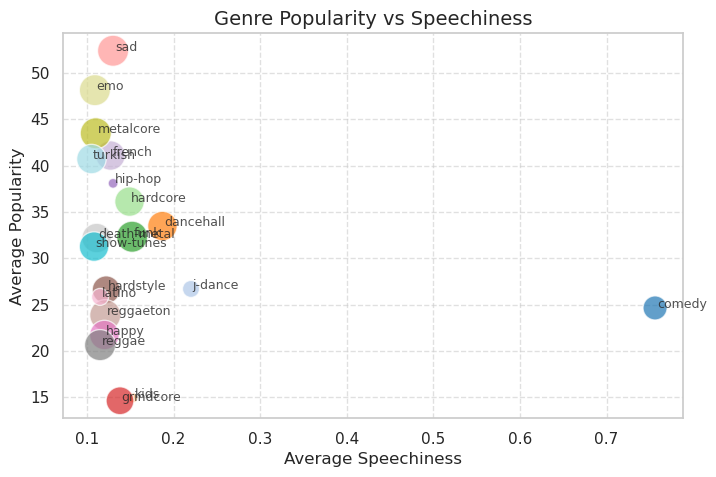

In [36]:
# Complex Query 1
df = pd.read_csv('/lab/outputs/hive_complex_query1_results/000000_0', sep='\t', names=['track_genre', 'avg_speechiness', 'avg_popularity', 'total_tracks'])

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='avg_speechiness', y='avg_popularity', size='total_tracks', sizes=(50, 500), hue='track_genre', palette='tab20', alpha=0.7, legend=False)

for i in range(len(df)):
    plt.text(df['avg_speechiness'][i] + 0.002,
             df['avg_popularity'][i],
             df['track_genre'][i],
             fontsize=9, alpha=0.8)

plt.title('Genre Popularity vs Speechiness', fontsize=14)
plt.xlabel('Average Speechiness', fontsize=12)
plt.ylabel('Average Popularity', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

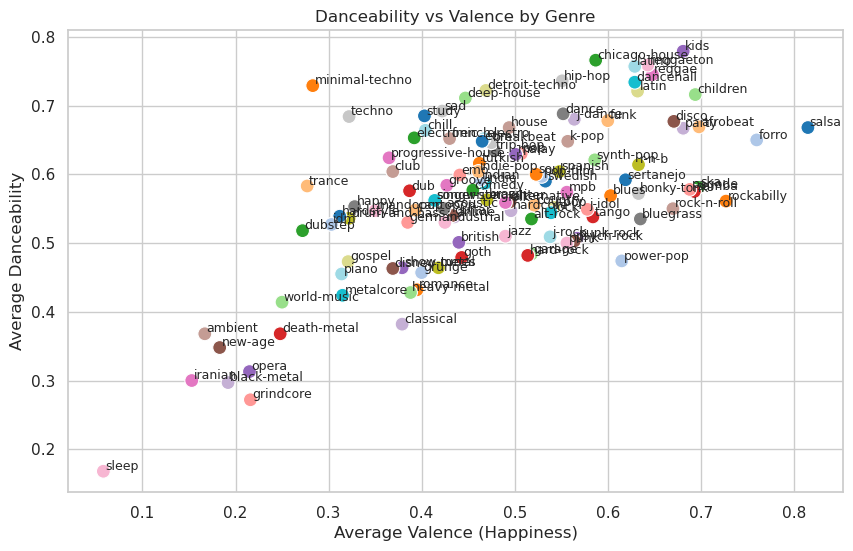

Correlation between valence and danceability: 0.63


In [37]:
# Complex Query 2
query2 = pd.read_csv('/lab/outputs/hive_complex_query2_results/000000_0', sep='\t', names=['track_genre','avg_valence','avg_danceability'])

plt.figure(figsize=(10,6))
sns.scatterplot(data=query2, x='avg_valence', y='avg_danceability', hue='track_genre', palette='tab20', s=100, legend=False)

for i in range(query2.shape[0]):
    plt.text(query2['avg_valence'][i]+0.002,
             query2['avg_danceability'][i]+0.002,
             query2['track_genre'][i],fontsize=9)

plt.title('Danceability vs Valence by Genre')
plt.xlabel('Average Valence (Happiness)')
plt.ylabel('Average Danceability')
plt.show()

corr = query2[['avg_valence','avg_danceability']].corr().iloc[0,1]
print(f'Correlation between valence and danceability: {corr:.2f}')

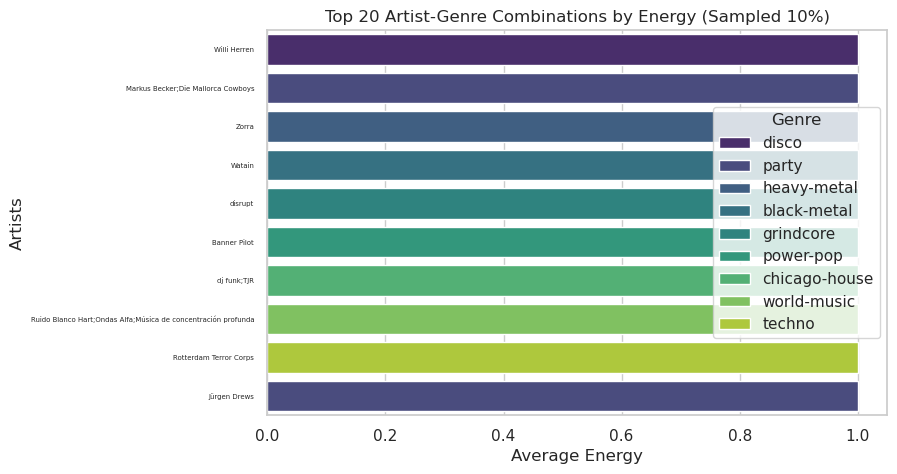

In [38]:
# Complex Query 3

df = pd.read_csv('/lab/outputs/hive_complex_query3_results/000000_0', sep='\t', header=None, names=['artists', 'track_genre', 'avg_energy', 'avg_popularity'])
# df.columns = ['artists', 'track_genre', 'avg_energy', 'avg_popularity']

df = df.sort_values('avg_energy', ascending=True)

plt.figure(figsize=(8,5))
sns.barplot(x='avg_energy', y='artists', hue='track_genre', data=df, dodge=False, palette='viridis')
plt.xlabel('Average Energy')
plt.ylabel('Artists')
plt.yticks(fontsize=5)
plt.title('Top 20 Artist-Genre Combinations by Energy (Sampled 10%)')
plt.legend(title='Genre')
plt.show()